# <center> Data Cleaning </center>

## Missing Values

In [ ]:
import pandas as pd

excel_file = 'Final 4.xlsx'  # Replace 'sales_data.xlsx' with the path to your Excel file
sheet1_name = 'Sales Data'  # Replace 'Sheet1' with the name of your first sheet
sheet2_name = 'Customer Data'  # Replace 'Sheet2' with the name of your second sheet

# Read data from both sheets
Sales_Data = pd.read_excel(excel_file, sheet_name=sheet1_name)
Customer_Data = pd.read_excel(excel_file, sheet_name=sheet2_name)

In [3]:
# Check for missing values in each sheet
missing_values_Sales_Data = Sales_Data.isnull().sum()
missing_values_Customer_Data = Customer_Data.isnull().sum()


### In Sales Data Sheet

In [4]:
# In Sales Data Sheet
print(missing_values_Sales_Data)

Order ID                           0
Order Date                         0
Product Name                       0
Product Category                   0
Quantity                           0
Price per Unit                     0
Total Cost                         0
City                               0
State                              0
Zip Code                           0
Ship Date                          0
Delivered Date                     0
Mode of Payment                    0
Order Returned                     0
Customer Rating (out of 5)         0
Customer ID                        0
Category ID                        0
Return Reason                 499354
Reason ID                     499354
Product ID                         0
dtype: int64


### In Customer Data Sheet

In [5]:
# In Customer Data Sheet
print(missing_values_Customer_Data)

Customer ID    0
First Name     0
Last Name      0
Age            0
Sex            0
Address        0
City           0
State          0
Zip Code       0
dtype: int64


## Handling Missing Values

In [6]:
if 'Return Reason' in Sales_Data.columns and 'Reason ID' in Sales_Data.columns:
    # Fill missing values in 'Column1' and 'Column2' with "Not Applicable"
    Sales_Data['Return Reason'].fillna("Not Applicable", inplace=True)
    Sales_Data['Reason ID'].fillna("Not Applicable", inplace=True)
else:
    print("One or both columns ('Return Reason' and/or 'Reason ID') not found in the DataFrame.")


In [10]:
Sales_Data.isnull().sum()

Order ID                      0
Order Date                    0
Product Name                  0
Product Category              0
Quantity                      0
Price per Unit                0
Total Cost                    0
City                          0
State                         0
Zip Code                      0
Ship Date                     0
Delivered Date                0
Mode of Payment               0
Order Returned                0
Customer Rating (out of 5)    0
Customer ID                   0
Category ID                   0
Return Reason                 0
Reason ID                     0
Product ID                    0
dtype: int64

## Outlier Analysis

### For Sales Data

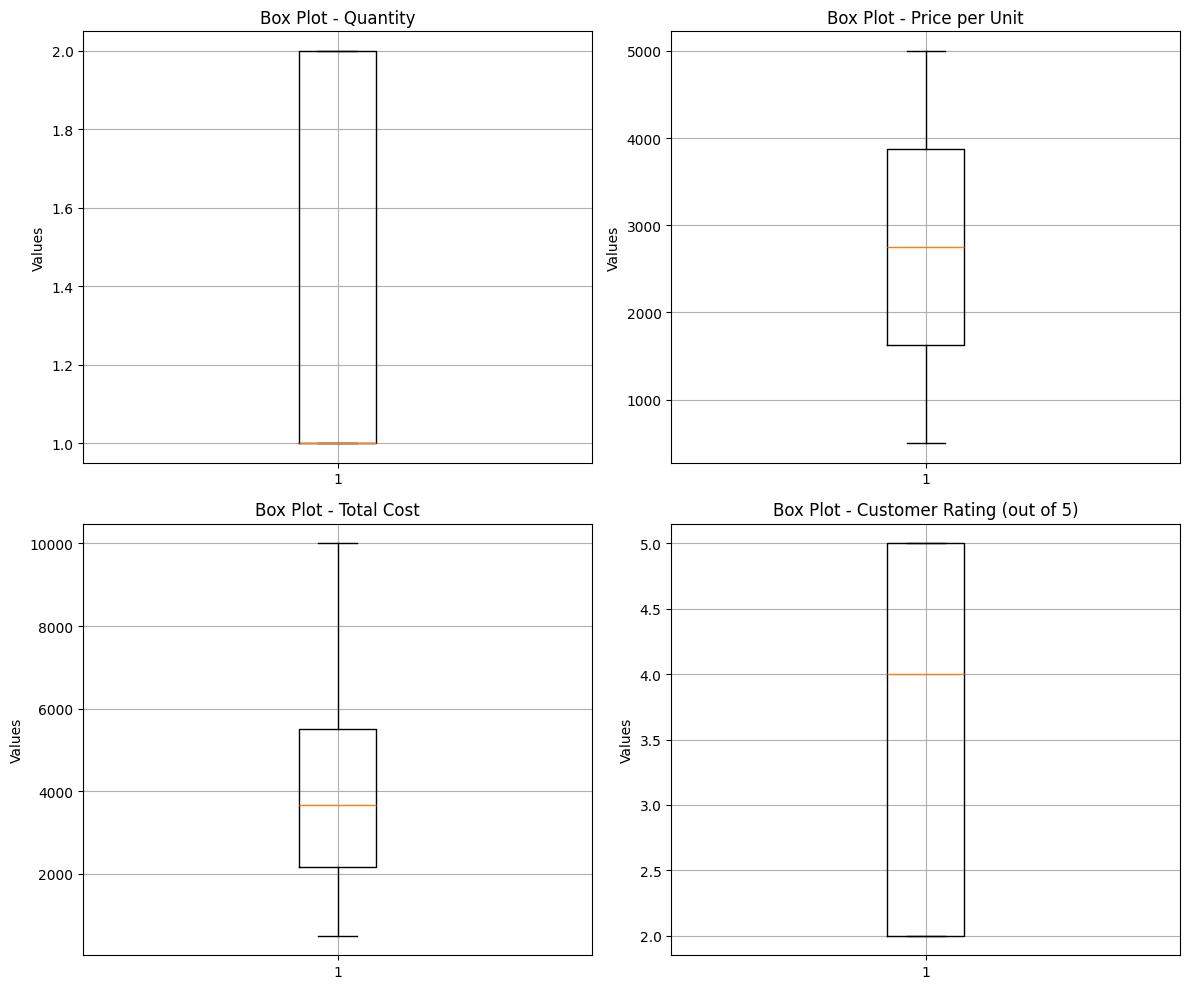

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = ['Quantity', 'Price per Unit', 'Total Cost', 'Customer Rating (out of 5)']  
num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))  # Adjust figsize as needed
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(Sales_Data[column])
    ax.set_title(f'Box Plot - {column}')
    ax.set_ylabel('Values')
    ax.grid(True)

if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### For Customer Data

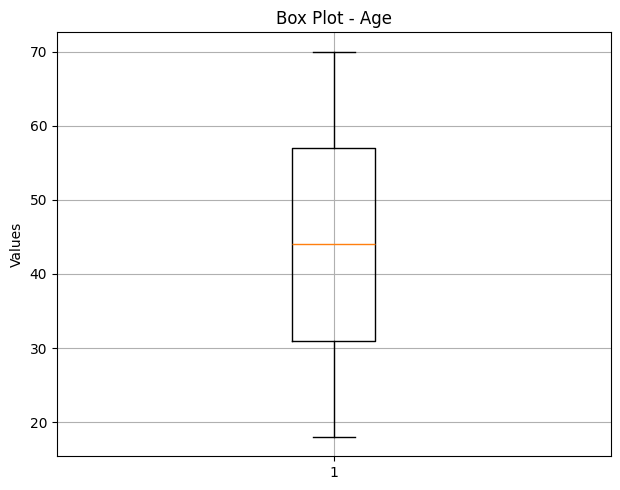

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = ['Age']  
num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2 

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))  # Adjust figsize as needed
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(Customer_Data[column])
    ax.set_title(f'Box Plot - {column}')
    ax.set_ylabel('Values')
    ax.grid(True)

if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()



### Comment
As Box plot shows there are no outlier present in any sheet's columns

## Duplicate Data

### For Sales Data

In [16]:
column_to_check = 'Order ID'

column_duplicates = Sales_Data[column_to_check].duplicated()

sum_duplicates = column_duplicates.sum()

print("Sum of duplicate values in column '{}' is: {}".format(column_to_check, sum_duplicates))

Sum of duplicate values in column 'Order ID' is: 0


### For Customer Data

In [17]:
column_to_check = 'Customer ID'

column_duplicates = Customer_Data[column_to_check].duplicated()

sum_duplicates = column_duplicates.sum()

print("Sum of duplicate values in column '{}' is: {}".format(column_to_check, sum_duplicates))

Sum of duplicate values in column 'Customer ID' is: 0


### Comment
There are no Duplicate data in specified columns


## Exporting

In [20]:
# Create an ExcelWriter object
with pd.ExcelWriter('Final_Dataset.xlsx') as writer:  # Replace 'output.xlsx' with the desired output file name
    # Write each DataFrame to a separate sheet
    Sales_Data.to_excel(writer, sheet_name='Sales_Data', index=False)
    Customer_Data.to_excel(writer, sheet_name='Customer_Data', index=False)